# <CENTER> The Sparks Foundation - GRIP June 2021 </CENTER>

## <center> TASK 1: Prediction using Supervised ML </center>

### Author:                             Shivam Vora

### Problem Statement

• Predict the percentage of an student based on the no. of study hours.

• What will be predicted score if a student studies for 9.25 hrs/ day?

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

#### Collecting Data

In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print("Data Set collected successfully")

Data set collected successfully


In [4]:
# check first 10 attributes
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Analysis

#### Shape of Data Set

In [6]:
data.shape

(25, 2)

#### Attributes

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

#### Datatypes

In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#### Information of Data Types 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Statistical Values 

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Check for Null Values 

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Check for Duplicate Values 

In [12]:
data.duplicated().sum()

0

#### Data Visualization 

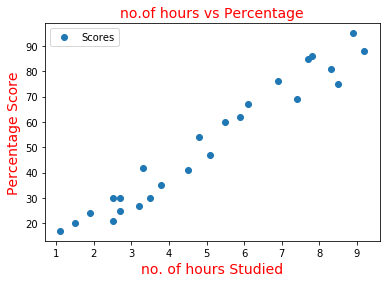

In [14]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('no.of hours vs Percentage',color='red',size=14)  
plt.xlabel('no. of hours Studied',color='red',size=14)  
plt.ylabel('Percentage Score',color='red',size=14)  
plt.show()

####  Data Preperation

Divide the dataset into "attributes" (inputs) and "labels" (outputs).

In [15]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

####  Train - Test Split

In [17]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=2)

####  Model Training

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Model's training is completed!")

Model's training is completed!


#### Plotting the regression line and test data 

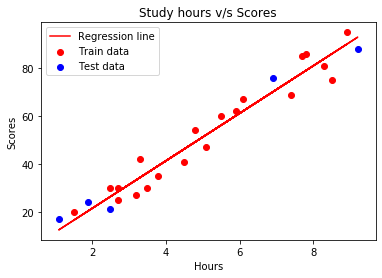

In [22]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x_train, y_train, label = "Train data", color = 'red')
plt.scatter(x_test, y_test, label = "Test data", color = 'blue')
plt.title("Study hours v/s Scores")
plt.plot(x, line, color = 'red', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

####  Predictions

In [23]:
print(x_test) 
y_pred = regressor.predict(x_test) 
y_pred

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

####  Comparing Actual Vs Predicted

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


#### Plotting of Actual Vs Predicted 

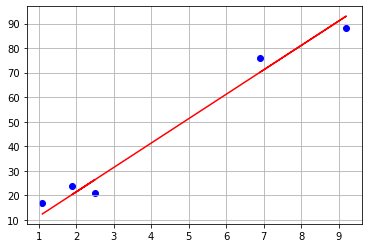

In [25]:
plt.scatter(x_test, y_test,color='blue')
plt.plot(x_test,y_pred,color='red');
plt.grid(True)
plt.show()

####  Making a predictive model

To predict the score, if the student studies for 9.25 hrs/day through the model.

In [26]:
hrs = 9.25
print(f"No of Hours studied = {hrs}")
print("Predicted Score = ")
print(regressor.predict([[hrs]]))

No of Hours studied = 9.25
Predicted Score = 
[93.45860056]


#### Model evaluation

In [27]:
from sklearn.metrics import r2_score
r2score = round(r2_score(y_pred, y_test)*100,3)
print("The r2 score : ",r2score)

The r2 score :  97.532


In [28]:
from sklearn import metrics
print("Absolute Error of the Test data of Linear regression : ",metrics.mean_absolute_error(y_pred, y_test))
print("Mean Squared Error of Test data of Linear regression : ",metrics.mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error of Test data of Linear regression : ",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Absolute Error of the Test data of Linear regression :  4.877039354964484
Mean Squared Error of Test data of Linear regression :  24.38762033985666
Root Mean Squared Error of Test data of Linear regression :  4.938382360637607


####  Conclusion

If the student studies for 9.25 hrs/ day, the predicted score will be 93.45.